O presente código é baseado na abordagem feita pelo curso gratuito “Practical Deep Learning for Coders, v3”. (https://github.com/hiromis/notes/blob/master/Lesson2.md)



# Importações e Coleta de Imagens

In [1]:
# Bibliotecas importantes que contém as funções necessárias
from fastai import *
from fastai.vision import *
import tensorflow as tf

In [2]:
# Acesso ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = Path('/content/drive/My Drive/MIXED/TRAIN')
path.ls()

[PosixPath('/content/drive/My Drive/MIXED/TRAIN/PNEUMONIA_BAC'),
 PosixPath('/content/drive/My Drive/MIXED/TRAIN/SAUDAVEL'),
 PosixPath('/content/drive/My Drive/MIXED/TRAIN/PNEUMONIA_VIR'),
 PosixPath('/content/drive/My Drive/MIXED/TRAIN/COVID')]

In [4]:
# Cria as classes que usaremos
classes = ['PNEUMONIA_BAC', 'SAUDAVEL', 'PNEUMONIA_VIR', 'COVID',]

# Verificação de Imagens Repetidas

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

PNEUMONIA_BAC


SAUDAVEL


PNEUMONIA_VIR


COVID


# Construção do Modelo

In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

Criação do Objeto ImageDataBunch

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, 
    train=".", 
    valid_pct=0.2,
    test="/content/drive/My Drive/MIXED/TEST",
    ds_tfms=get_transforms(), 
    size=224,
    num_workers=4
    ).normalize(imagenet_stats)

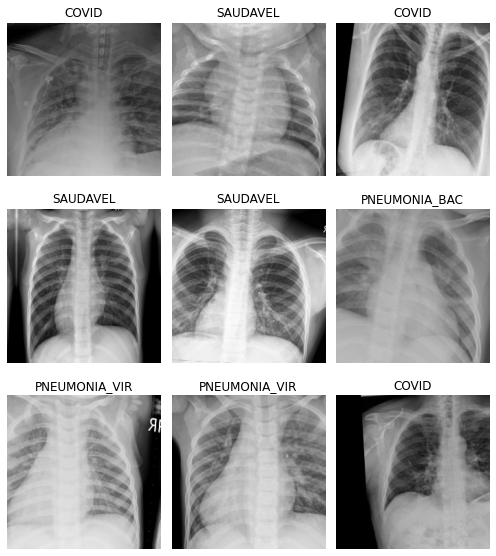

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['COVID', 'PNEUMONIA_BAC', 'PNEUMONIA_VIR', 'SAUDAVEL'], 4, 5532, 1383, 768)

# Treinamento do modelo

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [50]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.295552,0.342314,0.851772,0.148228,01:48
1,0.294242,0.364529,0.837310,0.162690,01:47
2,0.307862,0.398340,0.831526,0.168474,01:47
3,0.299354,0.341797,0.859002,0.140998,01:47
4,0.305991,0.345625,0.856833,0.143167,01:48
5,0.293401,0.334750,0.857556,0.142444,01:48
6,0.285146,0.368348,0.844541,0.155459,01:49
7,0.278589,0.342261,0.852495,0.147505,01:48
8,0.273169,0.335843,0.859002,0.140998,01:48
9,0.271628,0.353232,0.849602,0.150398,01:47


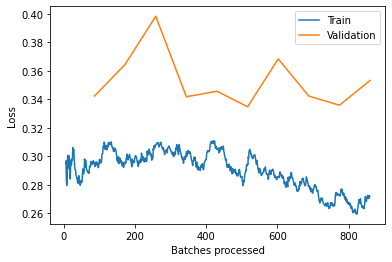

In [57]:
learn.recorder.plot_losses(skip_start=5)

# Interpretação dos resultados

RESULTADOS DE VALIDAÇÃO

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

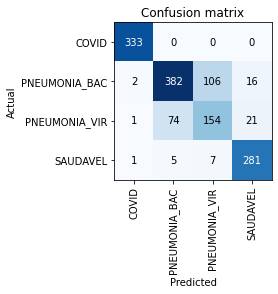

In [16]:
interp.plot_confusion_matrix()

RESULTADOS DE TESTE

In [17]:
# NÃO ESTAMOS CRIANDO OUTRO DATABUNCH PARA TESTES
np.random.seed(42)
data_test = ImageDataBunch.from_folder("/content/drive/My Drive/MIXED/TEST", valid_pct=0, 
            ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats).split_none().label_from_folder()

In [18]:
preds, a = learn.get_preds(ds_type=DatasetType.Test)
a = torch.argmax(preds, dim=1)

In [19]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve
 
y_true = data_test.train.y.items
y_pred = a.numpy()
print ("Precision", precision_score(y_true, y_pred, average='micro'))
print ("Recall", recall_score(y_true, y_pred, average='micro'))
print ("f1_score", f1_score(y_true, y_pred, average='micro'))
print ("confusion_matrix")
print (confusion_matrix(y_true, y_pred))

Precision 0.8763020833333334
Recall 0.8763020833333334
f1_score 0.8763020833333333
confusion_matrix
[[184   0   0   1]
 [  0 245  18  13]
 [  4  44  91  10]
 [  1   1   3 153]]
